In [3]:
import nextbike
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error 
from sklearn.linear_model import LinearRegression

def plotPerformance (featureList, maxPolyDegree, df, hour):

    df = df[df['sHour'] == hour]
    polynomialDegrees = [*range(1, maxPolyDegree + 1,1)]
    r2_test = []
    mae_test = []
    r2_train = []
    mae_train = []

    for polynomialDegree in polynomialDegrees:

        X = df[featureList].values
        Y = df[['duration']].values

        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

        poly_reg = PolynomialFeatures (degree = polynomialDegree)
        x_poly = poly_reg.fit_transform(x_train)

        model = LinearRegression(normalize = True, n_jobs=-1)
        model.fit(x_poly, y_train)

        y_pred_test = model.predict(poly_reg.fit_transform(x_test))
        y_pred_train = model.predict(poly_reg.fit_transform(x_train))
        r2_test.append(r2_score(y_test, y_pred_test))
        r2_train.append(r2_score(y_train, y_pred_train))
        mae_test.append(mean_absolute_error(y_test, y_pred_test))
        mae_train.append(mean_absolute_error(y_train, y_pred_train))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 5)
    ax1.plot([*range(1, maxPolyDegree + 1,1)], r2_test, color='green', label='test set')
    ax1.plot([*range(1, maxPolyDegree + 1,1)], r2_train, color='blue', label='train set')
    ax1.set_title('R² Score')
    ax1.legend(loc='upper left')
    ax1.set(xlabel='Polynomial Degree', ylabel='R²')
    ax2.plot([*range(1, maxPolyDegree + 1,1)], mae_test, color='green', label='test set')
    ax2.plot([*range(1, maxPolyDegree + 1,1)], mae_train, color='blue', label='train set')
    ax2.set_title('MAE Score')
    ax2.set(xlabel='Polynomial Degree', ylabel='MAE')
    ax2.legend(loc='upper right')

    return r2_test, r2_train, mae_test, mae_train

In [17]:
dfRaw = nextbike.io.read_file()
dfTrips = nextbike.io.preprocessData(dfRaw)
dfTrips = nextbike.io.createTrips(dfTrips)

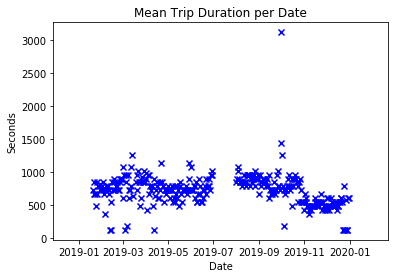

In [18]:
dfTrips['durationSeconds'] = dfTrips['duration'].dt.total_seconds()

plotMeanTripDuration = dfTrips.groupby(dfTrips.sTime.dt.date).durationSeconds.median()

plt.scatter(plotMeanTripDuration.index, plotMeanTripDuration, color='blue', marker='x')
plt.title('Mean Trip Duration per Date')
plt.xlabel('Date')
plt.ylabel('Seconds')
plt.show()

In [124]:
# dfTrips['durationSeconds'] = dfTrips['duration'].dt.total_seconds()
# durationSeconds = []

# week = 0
# month = 1
# meanWeek = dfTrips[dfTrips['sTime'].dt.week == week]['durationSeconds'].mean()
# stdWeek = dfTrips[dfTrips['sTime'].dt.week == week]['durationSeconds'].std()
# meanMonth = dfTrips[dfTrips['sTime'].dt.month == month]['durationSeconds'].mean()
# stdMonth = dfTrips[dfTrips['sTime'].dt.month == month]['durationSeconds'].std()

# for index, row in dfTrips.iterrows():
    
#     if row['sTime'].week != week:
#         week = row['sTime'].week
#         meanWeek = dfTrips[dfTrips['sTime'].dt.week == week]['durationSeconds'].mean()
#         stdWeek = dfTrips[dfTrips['sTime'].dt.week == week]['durationSeconds'].std()

#     if row['sTime'].month != month:
#         month = row['sTime'].month
#         meanMonth = dfTrips[dfTrips['sTime'].dt.month == month]['durationSeconds'].mean()
#         stdMonth = dfTrips[dfTrips['sTime'].dt.month == month]['durationSeconds'].std()

#     if (row['durationSeconds'] > (meanWeek + 0.5 * stdWeek)) | (row['durationSeconds'] < (meanWeek - 0.5 * stdWeek)):
#         durationSeconds.append(meanWeek)
#     else:
#         durationSeconds.append(row['durationSeconds'])

#     if (row['durationSeconds'] > (meanMonth + 0.5 * stdMonth)) | (row['durationSeconds'] < (meanMonth - 0.5 * stdMonth)):
#         old = durationSeconds.pop()
#         durationSeconds.append(mean)

# dfTrips['durationSeconds'] = durationSeconds

In [125]:
# plotMeanTripDuration = dfTrips.groupby(dfTrips.sTime.dt.date).durationSeconds.mean()

# plt.scatter(plotMeanTripDuration.index, plotMeanTripDuration, color='blue', marker='x')
# plt.title('Mean Trip Duration per Date')
# plt.xlabel('Date')
# plt.ylabel('Seconds')
# plt.show()

In [126]:
dfTrips = drop_outliers(dfTrips)
dfTrips.head()

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber,durationSeconds,durationInSec
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159,660.0,660
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178,480.0,480
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150,900.0,900
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150,180.0,180
5,11270,2019-01-20 00:25:00,2019-01-20 00:37:00,00:12:00,8.775948,50.813203,8.775948,50.813203,True,15,5156,5156,720.0,720


In [128]:
dfTrips.to_csv('trips.csv', sep=';')

In [4]:
dfTrips = pd.read_csv('trips.csv', sep=';')

dfTrips['sTime'] = pd.to_datetime(dfTrips['sTime'])
dfTrips['eTime'] = pd.to_datetime(dfTrips['eTime'])
dfTrips['duration'] = pd.to_timedelta(dfTrips['duration'])
dfTrips.drop('Unnamed: 0',axis=1,inplace=True)

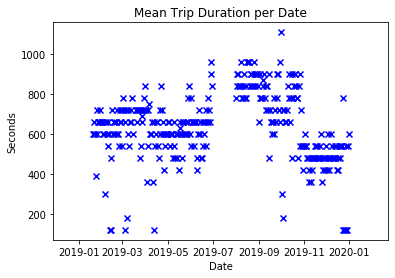

In [5]:
plotMeanTripDuration = dfTrips.groupby(dfTrips.sTime.dt.date).durationInSec.median()

plt.scatter(plotMeanTripDuration.index, plotMeanTripDuration, color='blue', marker='x')
plt.title('Mean Trip Duration per Date')
plt.xlabel('Date')
plt.ylabel('Seconds')
plt.show()

In [6]:
dfWeather = nextbike.io.getWeatherData()
dfWeatherMinutes = pd.DataFrame({'date': pd.date_range('2019-01-01', '2020-01-01', freq='min', closed='left')})
dfWeatherMinutes = dfWeatherMinutes.set_index('date')
dfWeatherMinutes = dfWeatherMinutes.join(dfWeather)
dfWeatherMinutes = dfWeatherMinutes.fillna(axis='index', method='ffill')
dfWeatherMinutes

,temperature,precipitation
date,,
2019-01-01 00:00:00,7.6,0.0
2019-01-01 00:01:00,7.6,0.0
2019-01-01 00:02:00,7.6,0.0
2019-01-01 00:03:00,7.6,0.0
2019-01-01 00:04:00,7.6,0.0
...,...,...
2019-12-31 23:55:00,-2.5,0.0
2019-12-31 23:56:00,-2.5,0.0
2019-12-31 23:57:00,-2.5,0.0


In [7]:
dfTrips = dfTrips.join(dfWeatherMinutes, how='left', on='sTime')
dfTrips.head()

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber,durationSeconds,durationInSec,temperature,precipitation
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159,660.0,660,-10.7,0.0
1,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178,480.0,480,-2.2,0.0
2,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150,900.0,900,-1.1,0.0
3,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150,180.0,180,-1.5,0.0
4,11270,2019-01-20 00:25:00,2019-01-20 00:37:00,00:12:00,8.775948,50.813203,8.775948,50.813203,True,15,5156,5156,720.0,720,-9.7,0.0


In [8]:
dfTrips = dfTrips.drop(columns=['eTime', 'eLong', 'eLat', 'ePlaceNumber', 'durationInSec'])
dfTrips['sMonth'] = dfTrips['sTime'].dt.month
dfTrips['sDay'] = dfTrips['sTime'].dt.weekday
dfTrips['sHour'] = dfTrips['sTime'].dt.hour
dfTrips['sMinute'] = dfTrips['sTime'].dt.minute
dfTrips = dfTrips.drop(columns=['sTime'])
dfTrips['duration'] = dfTrips['duration'].dt.total_seconds()
dfTrips.head()

,bNumber,duration,sLong,sLat,weekend,bType,sPlaceNumber,durationSeconds,temperature,precipitation,sMonth,sDay,sHour,sMinute
0,11169,660.0,8.763266,50.795224,True,15,5173,660.0,-10.7,0.0,1,6,1,55
1,11169,480.0,8.770358,50.804522,True,15,5159,480.0,-2.2,0.0,1,6,11,58
2,11169,900.0,8.759248,50.804725,True,15,5178,900.0,-1.1,0.0,1,6,15,12
3,11169,180.0,8.774681,50.822927,True,15,5150,180.0,-1.5,0.0,1,6,15,39
4,11270,720.0,8.775948,50.813203,True,15,5156,720.0,-9.7,0.0,1,6,0,25


## weekend model

In [8]:
dfTripsWeekend = dfTrips[dfTrips['weekend'] == True]
dfTripsWeekend

,bNumber,duration,sLong,sLat,weekend,bType,sPlaceNumber,durationSeconds,temperature,precipitation,sMonth,sDay,sHour,sMinute
0,11169,660.0,8.763266,50.795224,True,15,5173,660.0,-10.7,0.0,1,6,1,55
1,11169,480.0,8.770358,50.804522,True,15,5159,480.0,-2.2,0.0,1,6,11,58
2,11169,900.0,8.759248,50.804725,True,15,5178,900.0,-1.1,0.0,1,6,15,12
3,11169,180.0,8.774681,50.822927,True,15,5150,180.0,-1.5,0.0,1,6,15,39
4,11270,720.0,8.775948,50.813203,True,15,5156,720.0,-9.7,0.0,1,6,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564316,11070,120.0,8.769306,50.813878,True,15,0,120.0,-4.5,0.0,12,6,2,55
564317,11070,120.0,8.769306,50.813878,True,15,0,120.0,-0.3,0.0,12,6,15,56
564318,11107,120.0,8.769331,50.813813,True,15,0,120.0,-4.5,0.0,12,6,2,55
564319,11107,300.0,8.769331,50.813813,True,15,0,300.0,0.7,0.0,12,6,13,48


In [9]:
dfTripsWeekend.corr()

,bNumber,duration,sLong,sLat,weekend,bType,sPlaceNumber,durationSeconds,temperature,precipitation,sMonth,sDay,sHour,sMinute
bNumber,1.000000,-0.005113,-0.027852,-0.000124,NaN,0.725075,-0.009937,-0.005113,0.008914,-0.002215,-0.012787,-0.002152,-0.001381,0.003086
duration,-0.005113,1.000000,-0.002372,0.002332,NaN,-0.001477,0.032919,1.000000,0.127382,0.006586,-0.177785,-0.055404,0.032942,-0.035425
sLong,-0.027852,-0.002372,1.000000,0.000993,NaN,-0.018313,-0.031175,-0.002372,-0.007530,-0.001350,0.006737,-0.012002,0.008310,-0.016828
sLat,-0.000124,0.002332,0.000993,1.000000,NaN,0.000176,-0.014400,0.002332,-0.001057,-0.000573,0.004606,0.004935,-0.009670,-0.007803
weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bType,0.725075,-0.001477,-0.018313,0.000176,NaN,1.000000,-0.016125,-0.001477,-0.000334,-0.001278,0.013534,0.001632,0.006205,-0.000054
sPlaceNumber,-0.009937,0.032919,-0.031175,-0.014400,NaN,-0.016125,1.000000,0.032919,0.000951,-0.005683,-0.071370,0.018105,-0.022252,-0.006453
durationSeconds,-0.005113,1.000000,-0.002372,0.002332,NaN,-0.001477,0.032919,1.000000,0.127382,0.006586,-0.177785,-0.055404,0.032942,-0.035425
temperature,0.008914,0.127382,-0.007530,-0.001057,NaN,-0.000334,0.000951,0.127382,1.000000,-0.068711,-0.092071,0.008365,0.028844,-0.007568
precipitation,-0.002215,0.006586,-0.001350,-0.000573,NaN,-0.001278,-0.005683,0.006586,-0.068711,1.000000,0.020948,0.008734,-0.029837,-0.007120


In [10]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(['sMonth', 'sDay', 'temperature', 'sMinute'], 20, dfTripsWeekend)

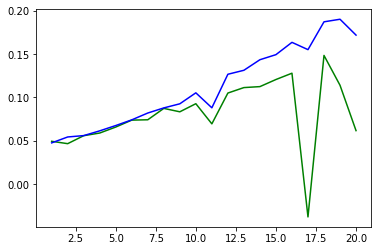

In [11]:
plt.plot([*range(1,21,1)], r2_test, color='green')
plt.plot([*range(1,21,1)], r2_train, color='blue')
plt.show()

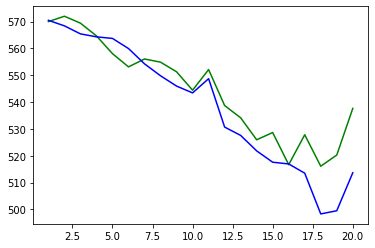

In [12]:
plt.plot([*range(1,21,1)], mae_test, color='green')
plt.plot([*range(1,21,1)], mae_train, color='blue')
plt.show()

## weekday model

In [13]:
dfTripsWeekday = dfTrips[dfTrips['weekend'] == False]
dfTripsWeekday

,bNumber,duration,sLong,sLat,weekend,bType,sPlaceNumber,durationSeconds,temperature,precipitation,sMonth,sDay,sHour,sMinute
281,11281,120.0,8.774697,50.803751,False,15,5175,120.0,-1.4,0.0,1,0,13,11
282,11281,300.0,8.774697,50.803751,False,15,5175,300.0,-2.8,0.0,1,0,14,33
283,11235,420.0,8.770358,50.804522,False,15,5159,420.0,-9.0,0.0,1,0,9,5
284,11235,2400.0,8.774241,50.810971,False,15,5166,2400.0,-5.8,0.0,1,0,15,56
285,11270,420.0,8.763264,50.813187,False,15,5167,420.0,-11.9,0.0,1,0,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564601,11265,900.0,8.774454,50.824867,False,15,0,900.0,0.3,0.0,12,1,18,53
564602,11265,540.0,8.759248,50.804725,False,15,5178,540.0,-0.8,0.0,12,1,22,13
564603,11265,420.0,8.775351,50.808070,False,15,5158,420.0,-1.1,0.0,12,1,22,37
564604,11080,960.0,8.774508,50.824840,False,15,0,960.0,2.0,0.0,12,1,12,26


In [14]:
dfTripsWeekday.corr()

,bNumber,duration,sLong,sLat,weekend,bType,sPlaceNumber,durationSeconds,temperature,precipitation,sMonth,sDay,sHour,sMinute
bNumber,1.000000,-0.000794,-0.030055,-0.000029,NaN,0.517652,-0.017044,-0.000794,0.006885,0.003436,0.000485,-0.000209,-0.003163,0.003714
duration,-0.000794,1.000000,-0.000983,-0.001743,NaN,0.004128,0.029884,1.000000,0.155526,-0.014128,-0.111910,0.002220,0.020766,-0.012732
sLong,-0.030055,-0.000983,1.000000,-0.000295,NaN,-0.014792,-0.008346,-0.000983,0.008969,0.000767,0.009902,-0.002039,-0.002318,0.003156
sLat,-0.000029,-0.001743,-0.000295,1.000000,NaN,0.000256,-0.013112,-0.001743,0.001825,-0.000494,0.003244,0.002286,0.002396,0.004753
weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bType,0.517652,0.004128,-0.014792,0.000256,NaN,1.000000,-0.015611,0.004128,-0.004064,-0.000374,0.027466,0.003377,-0.001563,0.002501
sPlaceNumber,-0.017044,0.029884,-0.008346,-0.013112,NaN,-0.015611,1.000000,0.029884,0.008924,-0.003390,-0.066605,0.003567,-0.024039,-0.001063
durationSeconds,-0.000794,1.000000,-0.000983,-0.001743,NaN,0.004128,0.029884,1.000000,0.155526,-0.014128,-0.111910,0.002220,0.020766,-0.012732
temperature,0.006885,0.155526,0.008969,0.001825,NaN,-0.004064,0.008924,0.155526,1.000000,-0.030965,0.009872,-0.029981,-0.023887,-0.007342
precipitation,0.003436,-0.014128,0.000767,-0.000494,NaN,-0.000374,-0.003390,-0.014128,-0.030965,1.000000,0.052044,0.004473,0.034250,0.020541


In [15]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(['sMonth', 'temperature', 'sPlaceNumber'], 20, dfTripsWeekday)

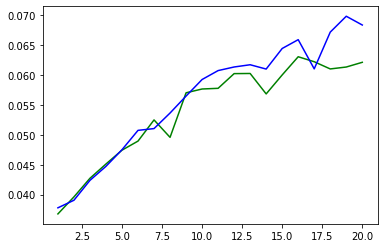

In [16]:
plt.plot([*range(1,21,1)], r2_test, color='green')
plt.plot([*range(1,21,1)], r2_train, color='blue')
plt.show()

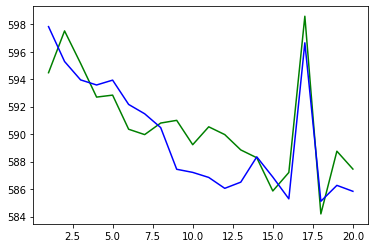

In [17]:
plt.plot([*range(1,21,1)], mae_test, color='green')
plt.plot([*range(1,21,1)], mae_train, color='blue')
plt.show()

## hourly model

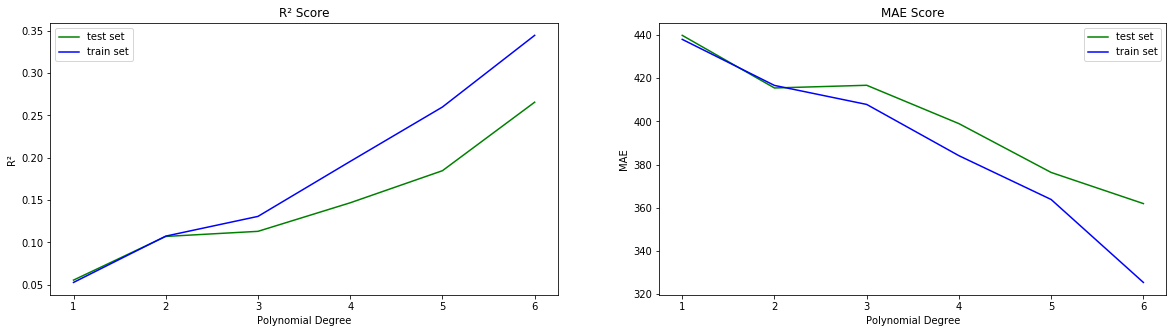

In [163]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=6, df=dfTrips, hour=0)

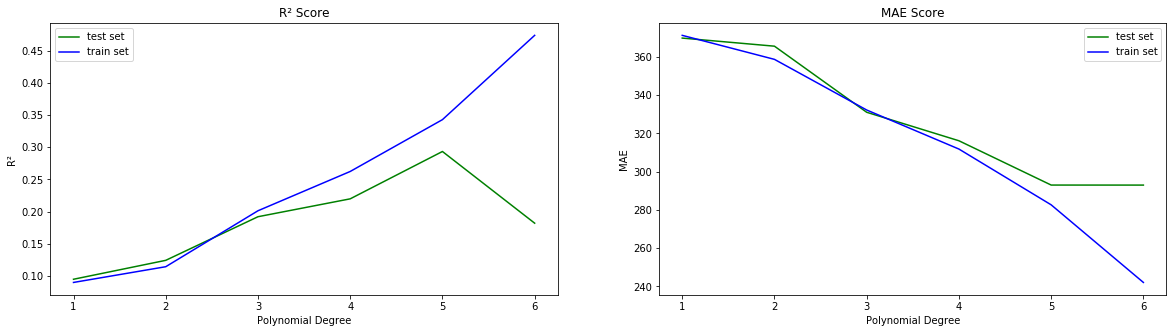

In [164]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=6, df=dfTrips, hour=1)

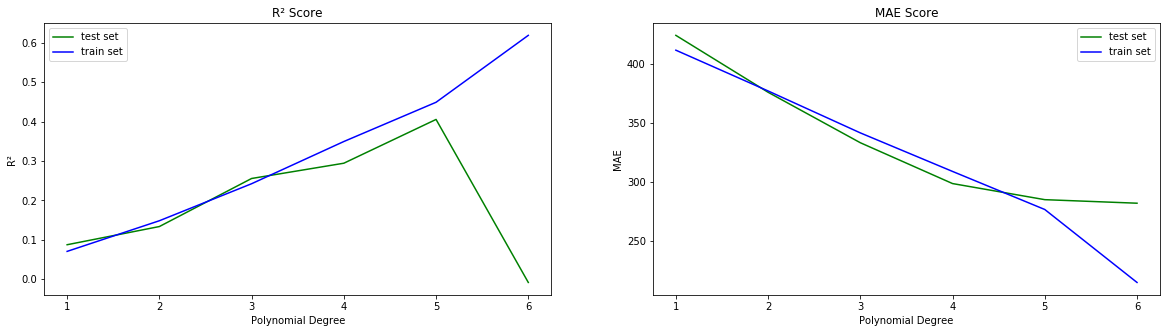

In [165]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=6, df=dfTrips, hour=2)

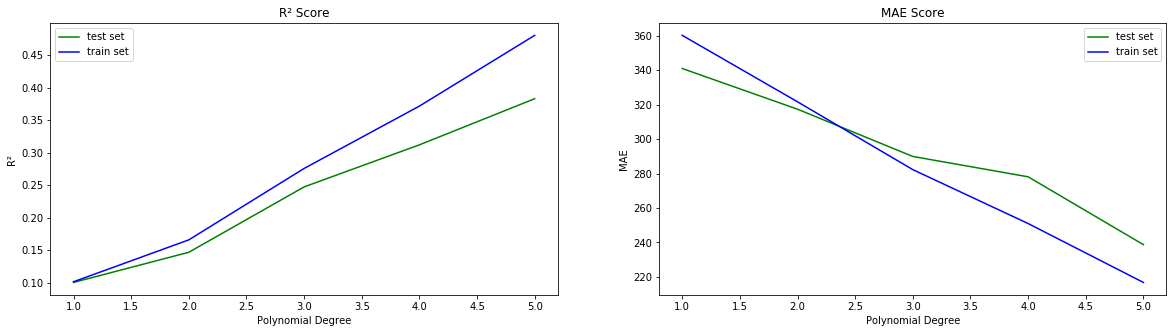

In [166]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=5, df=dfTrips, hour=3)

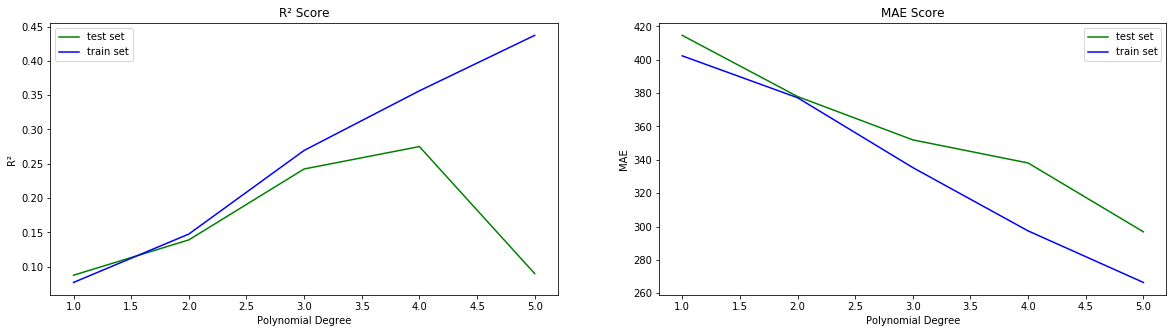

In [167]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=5, df=dfTrips, hour=4)

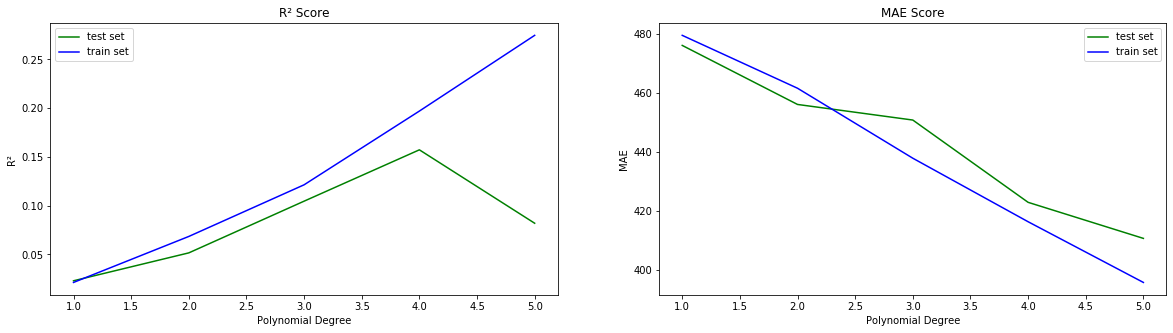

In [168]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=5, df=dfTrips, hour=5)

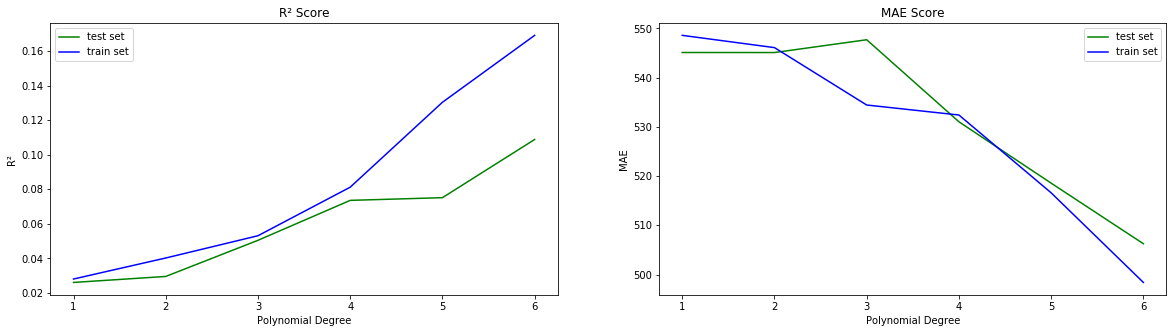

In [169]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=6, df=dfTrips, hour=6)

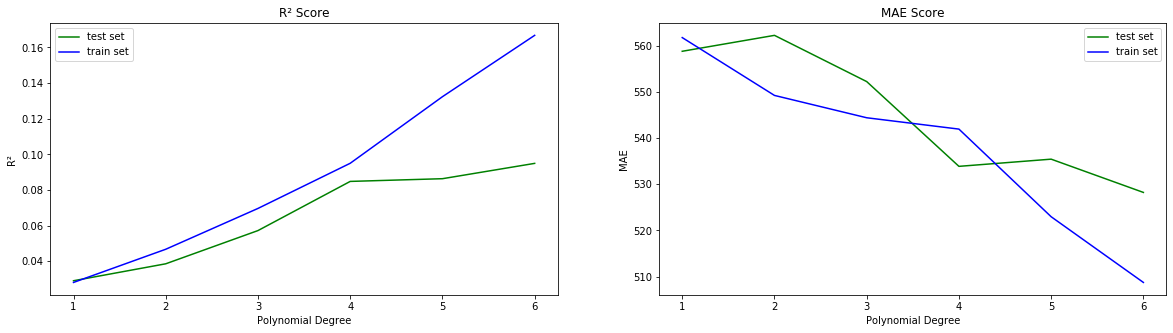

In [170]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=6, df=dfTrips, hour=7)

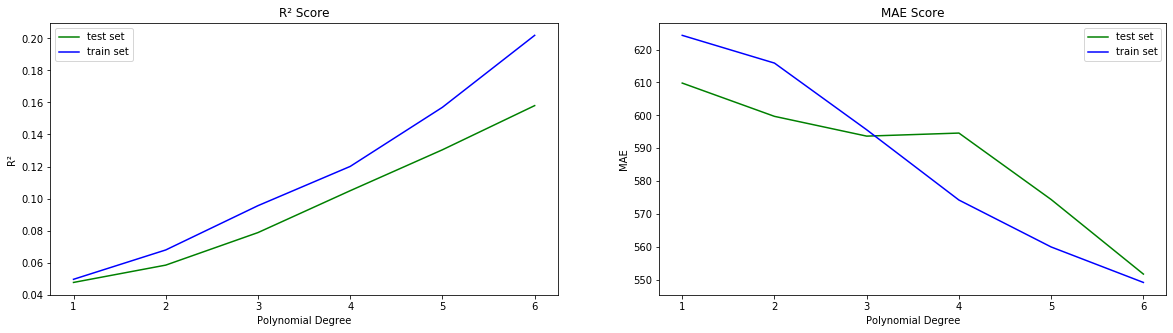

In [171]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=6, df=dfTrips, hour=8)

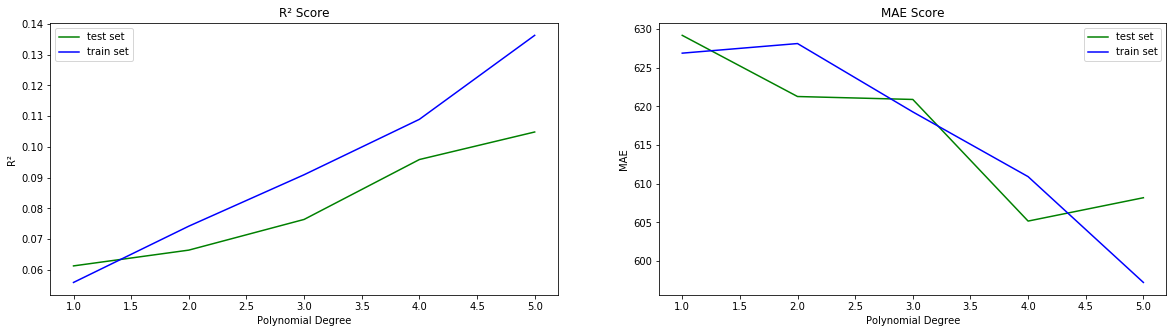

In [172]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=5, df=dfTrips, hour=9)

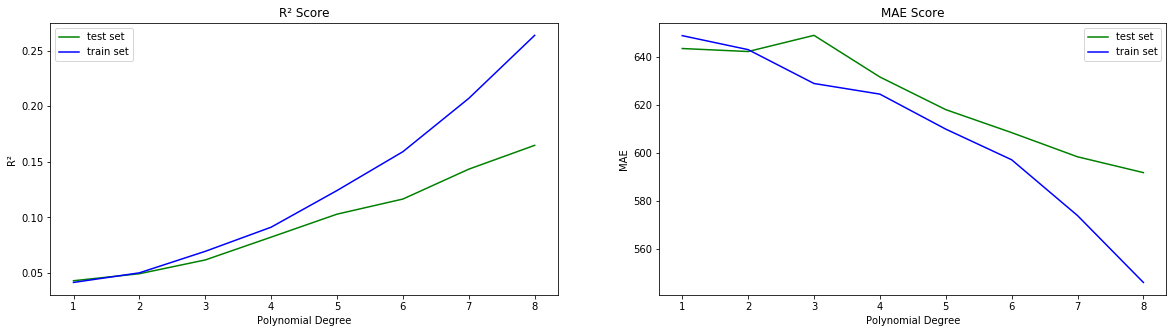

In [173]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=10)

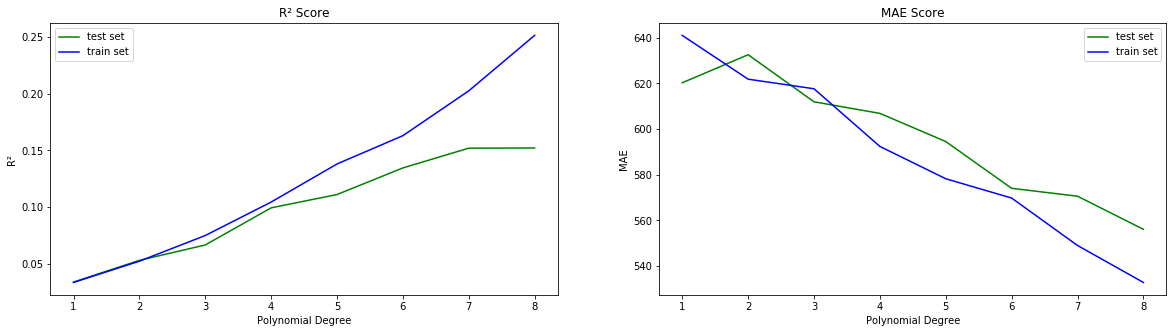

In [174]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=11)

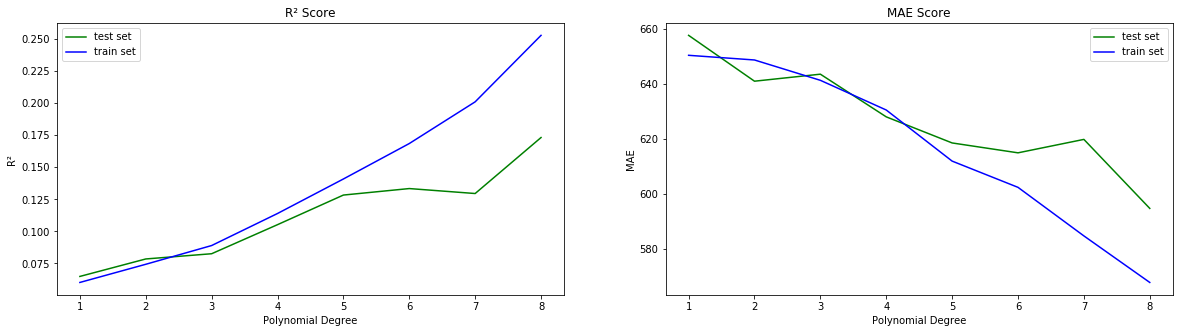

In [175]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=12)

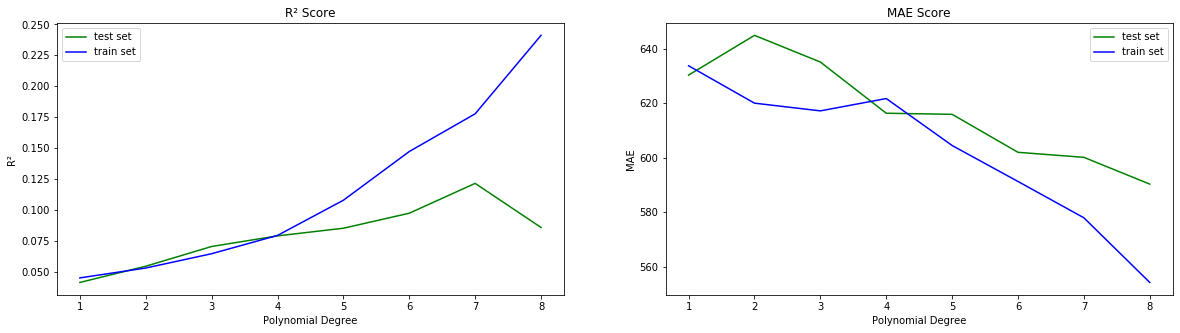

In [176]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=13)

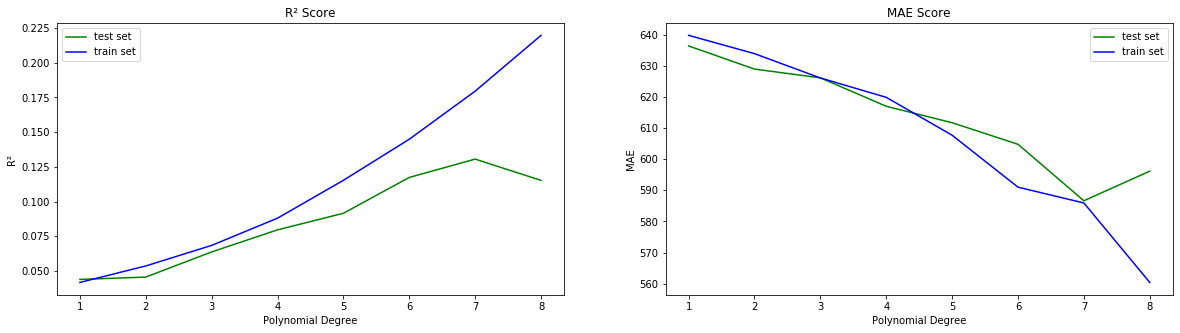

In [177]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=14)

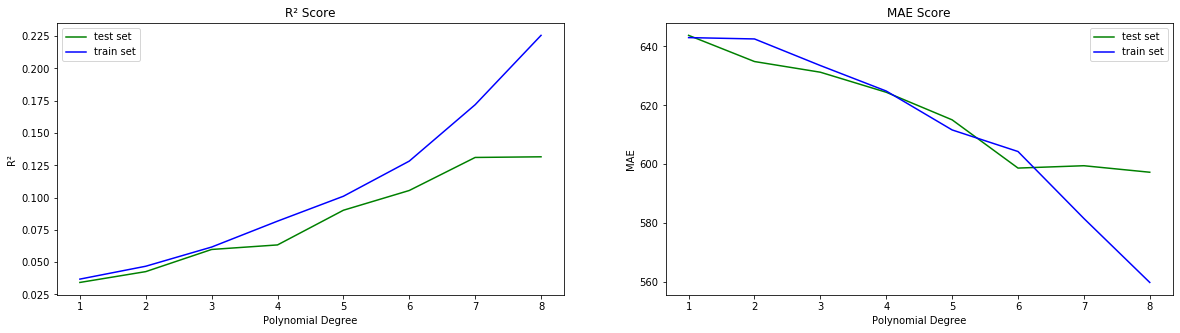

In [178]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=15)

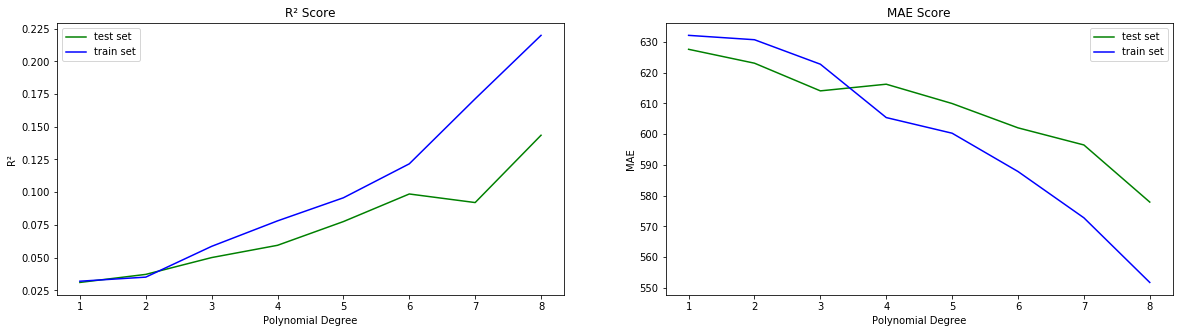

In [179]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=16)

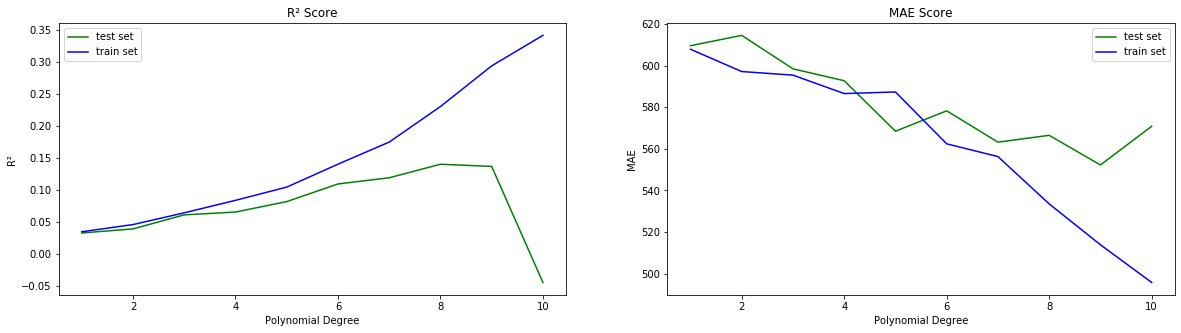

In [182]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=10, df=dfTrips, hour=17)

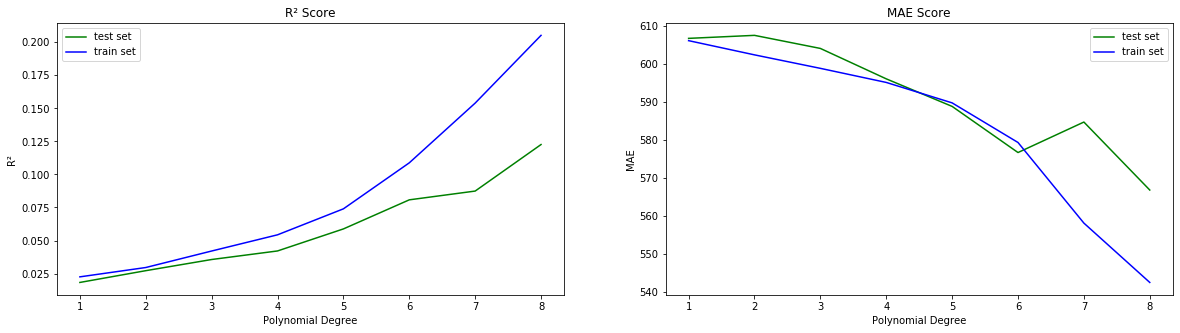

In [183]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=18)

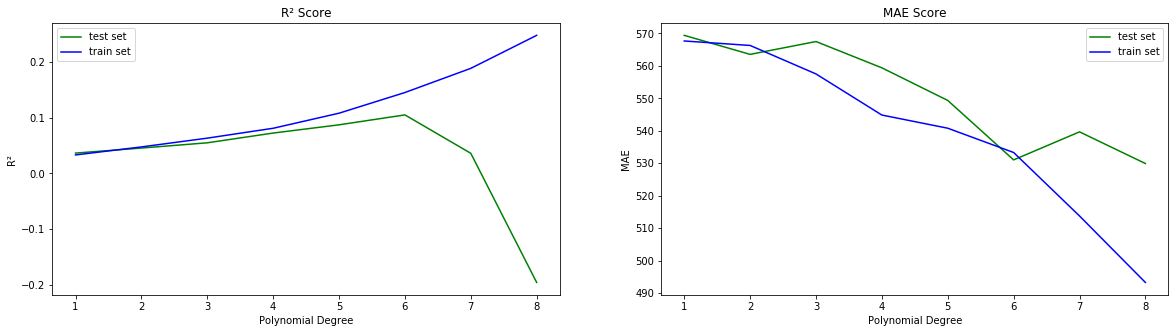

In [184]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=19)

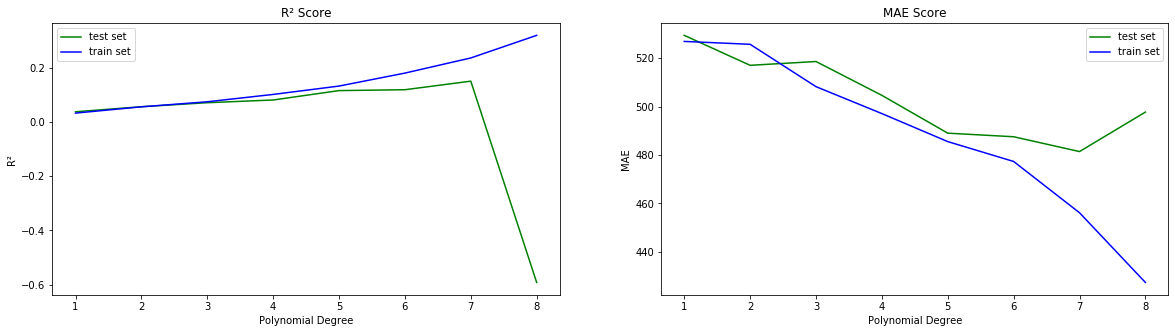

In [185]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=8, df=dfTrips, hour=20)

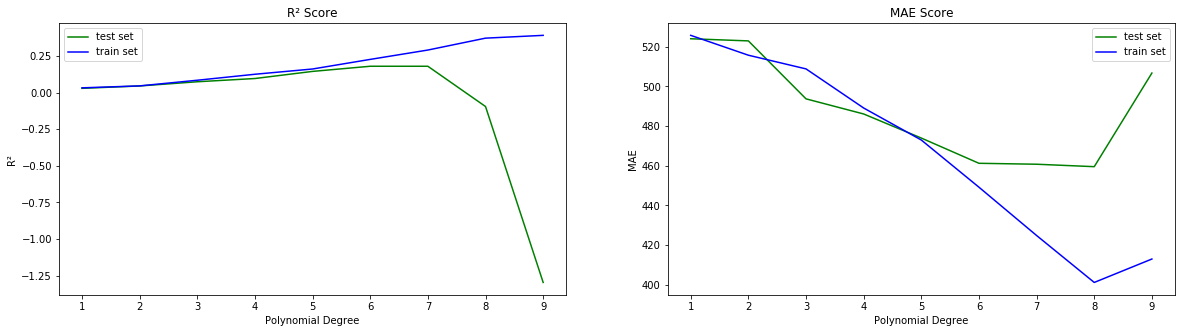

In [189]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=9, df=dfTrips, hour=21)

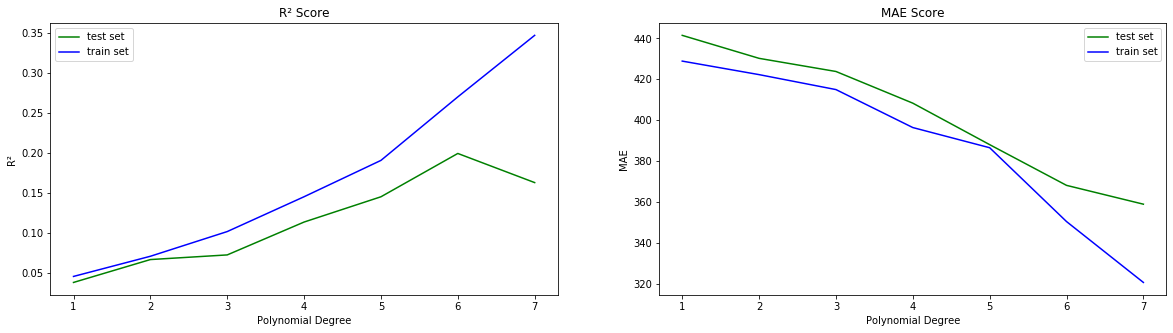

In [191]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=7, df=dfTrips, hour=22)

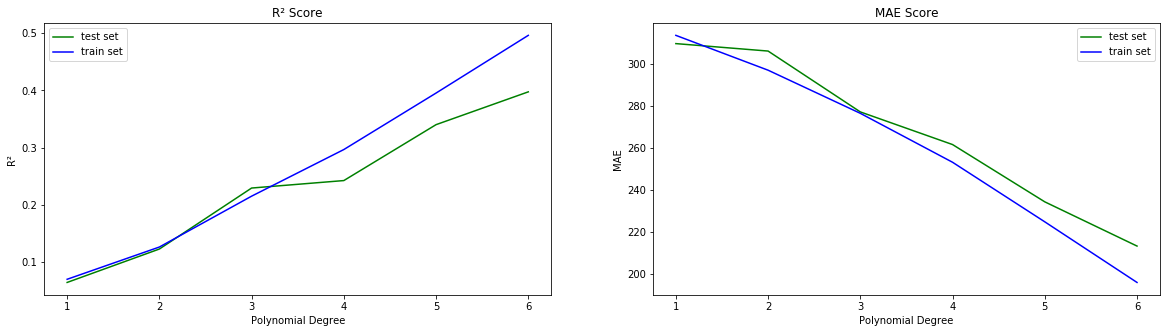

In [194]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(featureList=['sMonth', 'sDay', 'temperature', 'sMinute', 'sPlaceNumber'], maxPolyDegree=6, df=dfTrips, hour=23)